In [1]:
import numpy as np
import pandas as pd

In [2]:
df_rating=pd.read_csv('ml-latest-small/ratings.csv')
df_rating.head()
# df_rating.shape
# df_rating['movieId'].nunique()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [3]:
df_movienames=pd.read_csv('ml-latest-small/movies.csv')
df_movienames.head()
# df_movienames.shape
# df_movienames.title.nunique()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
df_moviedata=pd.merge(df_rating, df_movienames, on='movieId')
df_moviedata.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [5]:
df_moviedata.groupby('title')['rating'].mean().sort_values(ascending=False)

title
Gena the Crocodile (1969)                  5.0
True Stories (1986)                        5.0
Cosmic Scrat-tastrophe (2015)              5.0
Love and Pigeons (1985)                    5.0
Red Sorghum (Hong gao liang) (1987)        5.0
                                          ... 
Don't Look Now (1973)                      0.5
Journey 2: The Mysterious Island (2012)    0.5
Joe Dirt 2: Beautiful Loser (2015)         0.5
Jesus Christ Vampire Hunter (2001)         0.5
Fullmetal Alchemist 2018 (2017)            0.5
Name: rating, Length: 9719, dtype: float64

In [6]:
ratings=pd.DataFrame(df_moviedata.groupby('title')['rating'].mean())
ratings

,rating
title,
'71 (2014),4.000000
'Hellboy': The Seeds of Creation (2004),4.000000
'Round Midnight (1986),3.500000
'Salem's Lot (2004),5.000000
'Til There Was You (1997),4.000000
...,...
eXistenZ (1999),3.863636
xXx (2002),2.770833
xXx: State of the Union (2005),2.000000


In [7]:
# df_moviedata.groupby('title')['rating'].count().sort_values()
ratings['review_count']=pd.DataFrame(df_moviedata.groupby('title')['rating'].count())
# ratings.sort_values(by='rating', ascending=False)
ratings.head()

,rating,review_count
title,,
'71 (2014),4.0,1
'Hellboy': The Seeds of Creation (2004),4.0,1
'Round Midnight (1986),3.5,2
'Salem's Lot (2004),5.0,1
'Til There Was You (1997),4.0,2


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')

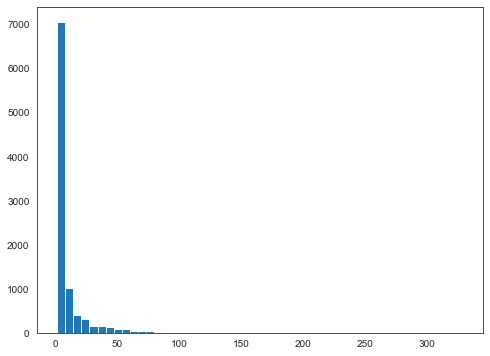

In [9]:
plt.figure(figsize=(8, 6))
plt.hist(ratings['review_count'], bins=50)
plt.show()

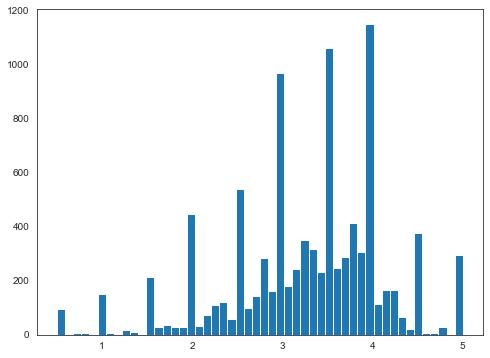

In [10]:
plt.figure(figsize=(8, 6))
plt.hist(ratings['rating'], bins=50)
plt.show()

<Figure size 576x432 with 0 Axes>

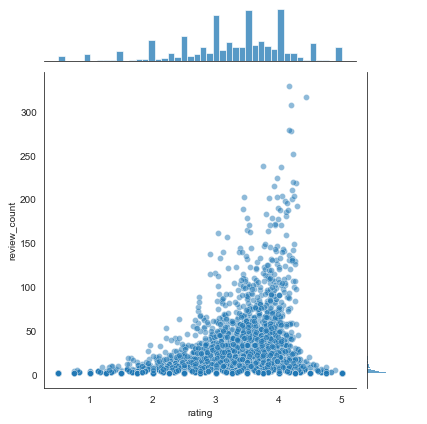

In [11]:
plt.figure(figsize=(8, 6))
sns.jointplot(x='rating', y='review_count', data=ratings, alpha=0.5)

In [12]:
df_movie_user_rating=df_moviedata.pivot_table(index='userId', columns='title', values='rating')
df_movie_user_rating

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
608,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.5,3.5,NaN,NaN,NaN


In [13]:
import warnings
warnings.filterwarnings('ignore')

In [14]:
def movie_recommend(movie_name):
    m_rating=df_movie_user_rating[movie_name]
    movie_like_m=df_movie_user_rating.corrwith(m_rating)
    corr_movie=pd.DataFrame(movie_like_m, columns=['Correlation'])
    corr_movie.dropna(inplace=True)
    corr_movie=corr_movie.join(ratings['review_count'])
    abc=corr_movie[corr_movie['review_count']>50].sort_values(by=['Correlation', 'review_count'], ascending=False)
#     print(abc)
    return abc

In [15]:
print('Enter movie name :', end=" ")
movie=input()


while(movie not in df_movienames.values):
    print("No such movie exist in database/nTry a different name")
    print('Enter movie name :', end=" ")
    movie=input()
else:
    recomm=movie_recommend(movie)
    size=recomm.shape[0]
    if size>=7:
        size=8
    print("\nFew Recommended Movies\n\n          Title")
    for i in range(1, size):
        if(recomm['Correlation'][i]>0.6):
            print(recomm.index[i])

# df_movie_user_rating['Star Wars: Episode II - Attack of the Clones (2002)']

Enter movie name : Star Wars: Episode II - Attack of the Clones (2002)

Few Recommended Movies

          Title
Star Wars: Episode I - The Phantom Menace (1999)
Star Wars: Episode III - Revenge of the Sith (2005)
Mr. Holland's Opus (1995)
Star Trek (2009)
Gone in 60 Seconds (2000)
Vertigo (1958)
Philadelphia (1993)
